In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
df = wine_quality.data.features 
output = wine_quality.data.targets 



In [11]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [12]:
output.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [14]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [15]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(1179)

In [17]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000
...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(5318, 11)

In [20]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,1.000000,0.214595,0.330225,-0.104641,0.288843,-0.281375,-0.327462,0.478148,-0.271094,0.304728,-0.102696
volatile_acidity,0.214595,1.000000,-0.384395,-0.163896,0.367573,-0.348865,-0.400715,0.308375,0.246837,0.227645,-0.065510
citric_acid,0.330225,-0.384395,1.000000,0.146078,0.055107,0.131113,0.194888,0.094663,-0.344675,0.059061,-0.005572
residual_sugar,-0.104641,-0.163896,0.146078,1.000000,-0.123302,0.399090,0.487593,0.520867,-0.234443,-0.174946,-0.305334
chlorides,0.288843,0.367573,0.055107,-0.123302,1.000000,-0.186518,-0.269896,0.371665,0.025914,0.404905,-0.269516
free_sulfur_dioxide,-0.281375,-0.348865,0.131113,0.399090,-0.186518,1.000000,0.720576,0.006360,-0.141968,-0.198075,-0.169887
total_sulfur_dioxide,-0.327462,-0.400715,0.194888,0.487593,-0.269896,0.720576,1.000000,0.006677,-0.223000,-0.275877,-0.248942
density,0.478148,0.308375,0.094663,0.520867,0.371665,0.006360,0.006677,1.000000,0.034377,0.282494,-0.667861
pH,-0.271094,0.246837,-0.344675,-0.234443,0.025914,-0.141968,-0.223000,0.034377,1.000000,0.168287,0.097392
sulphates,0.304728,0.227645,0.059061,-0.174946,0.404905,-0.198075,-0.275877,0.282494,0.168287,1.000000,-0.017166


<Axes: >

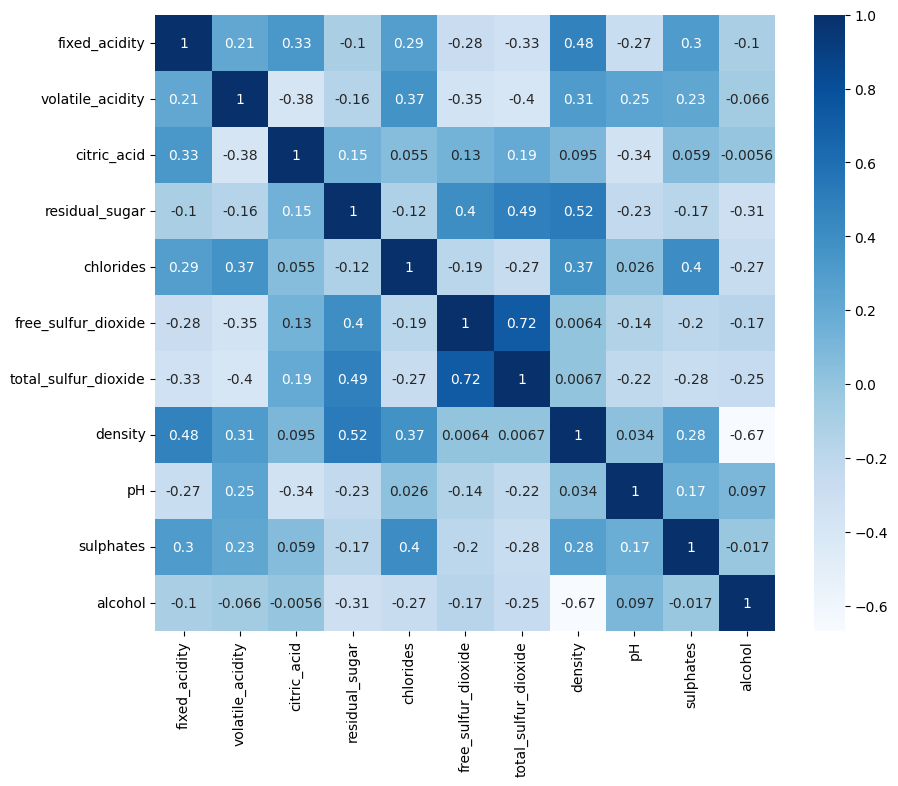

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [27]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


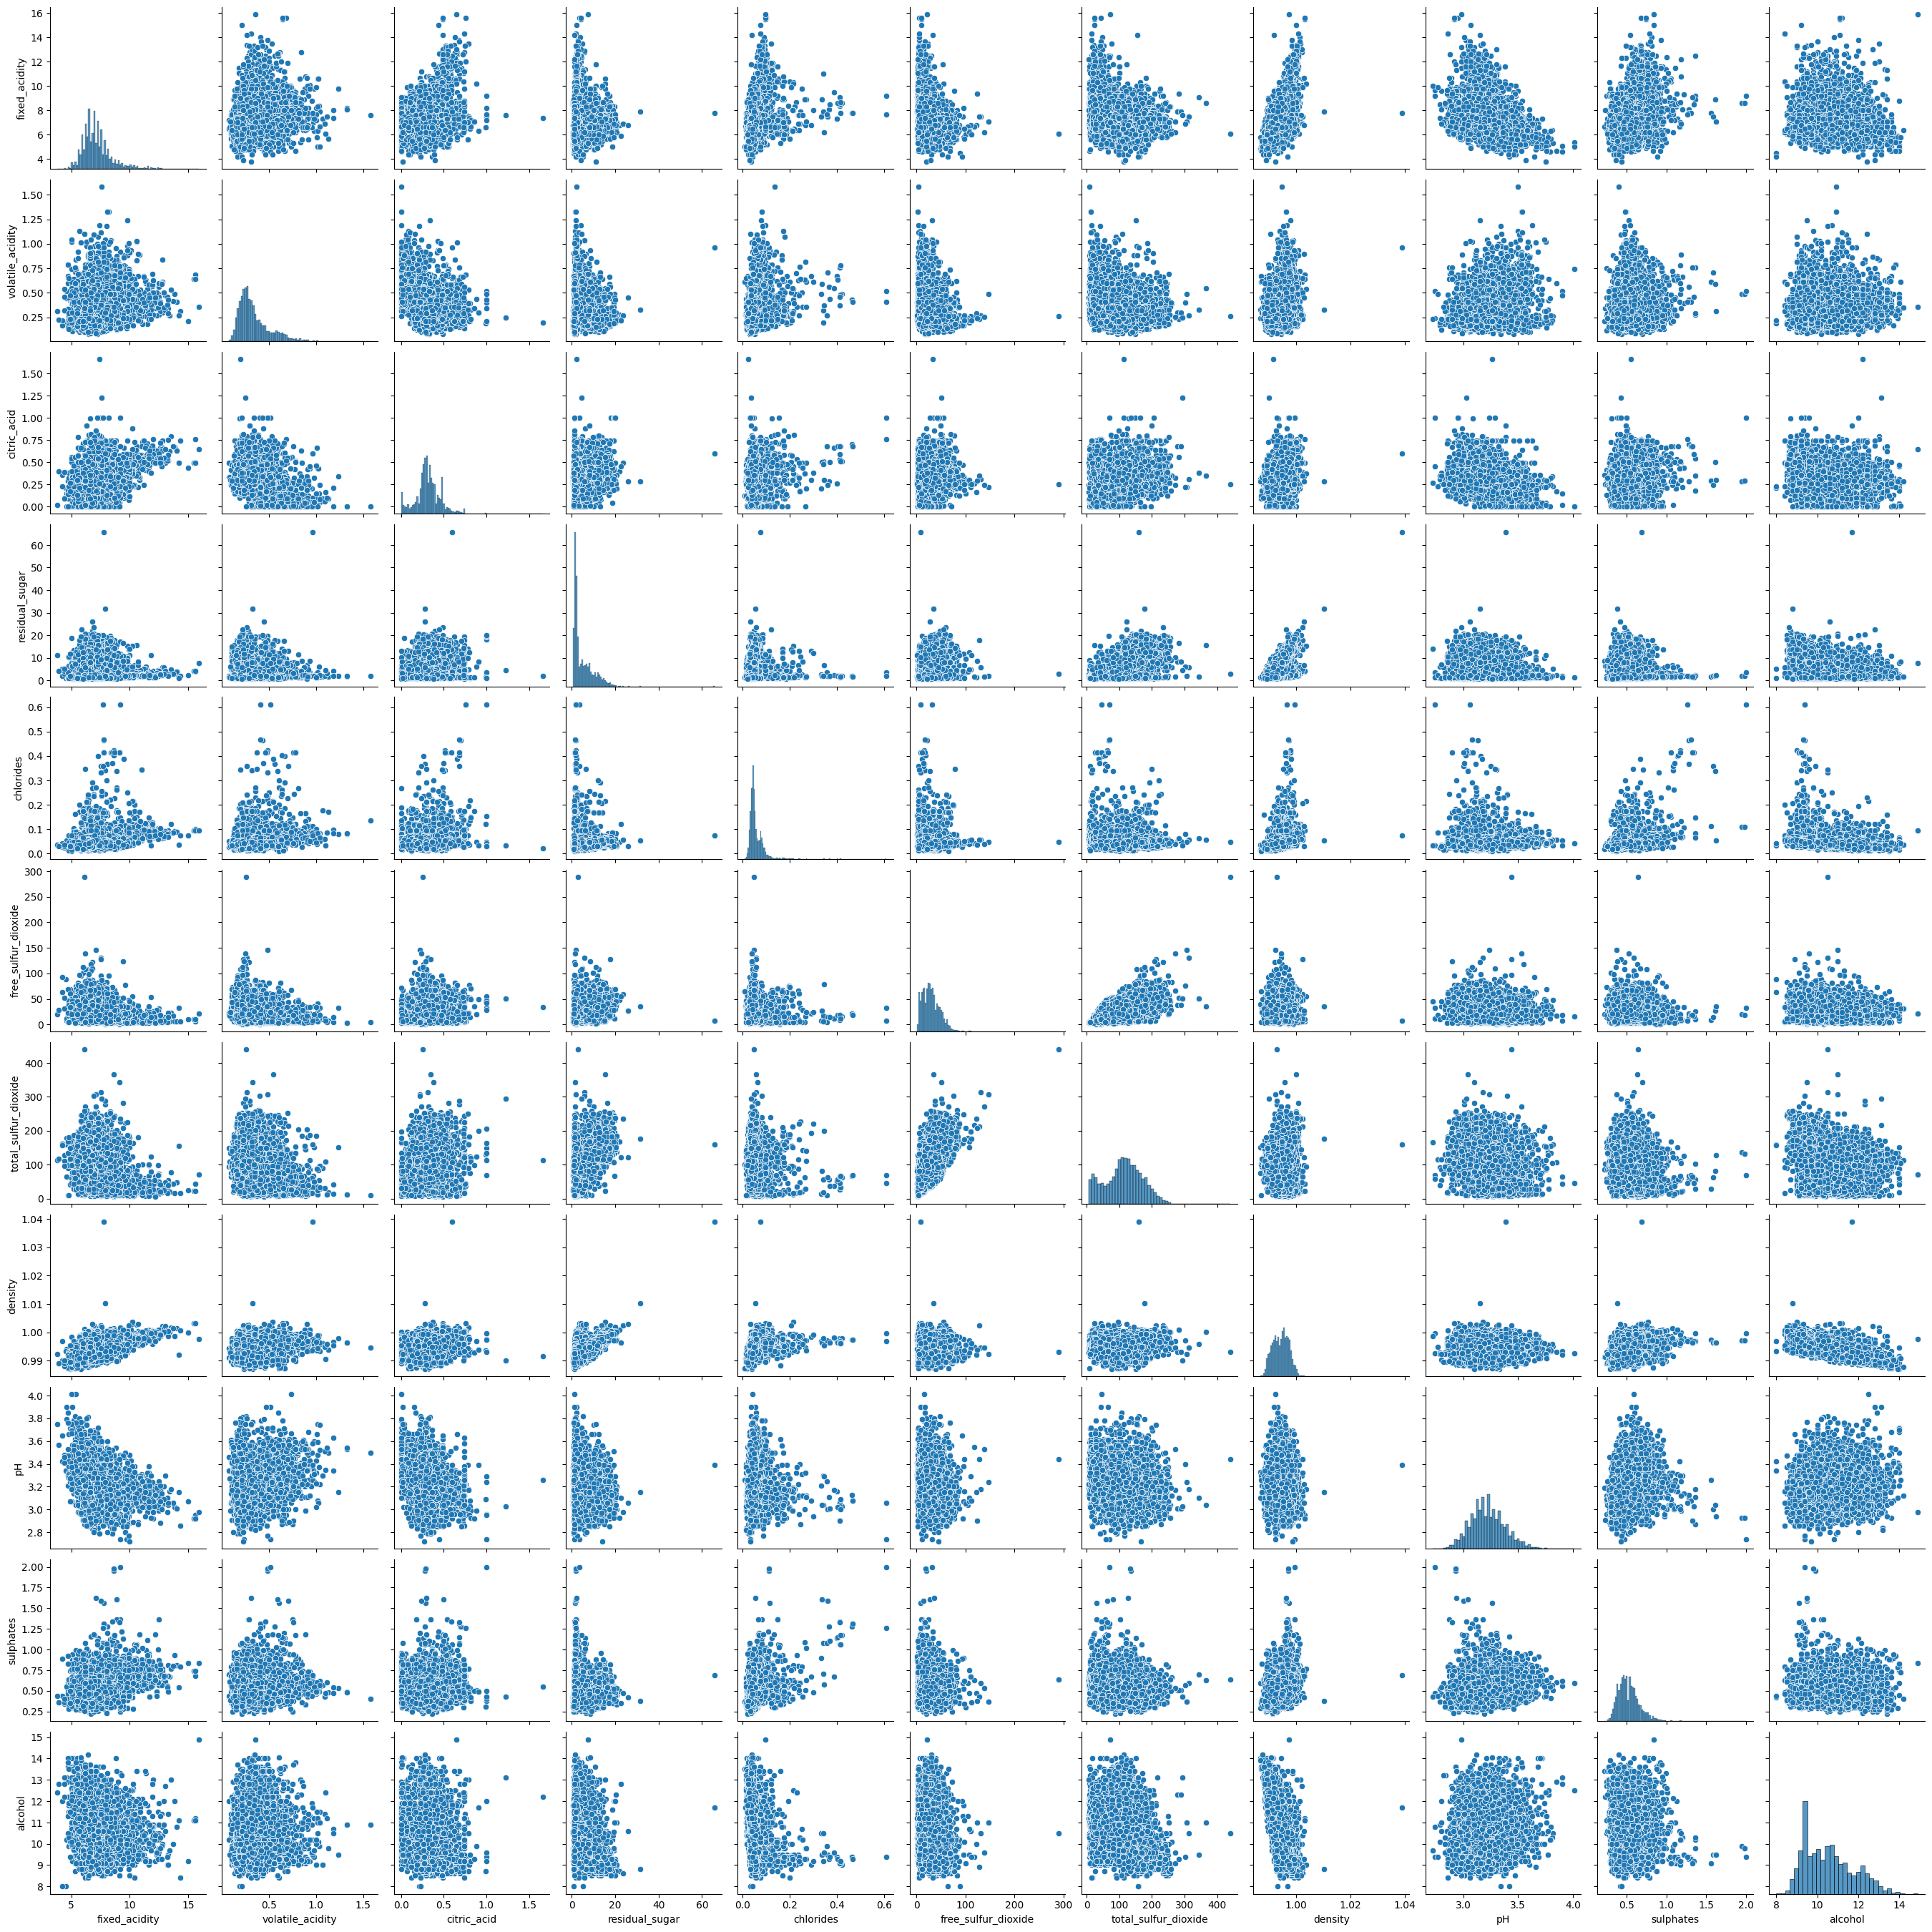

In [28]:
sns.pairplot(df)

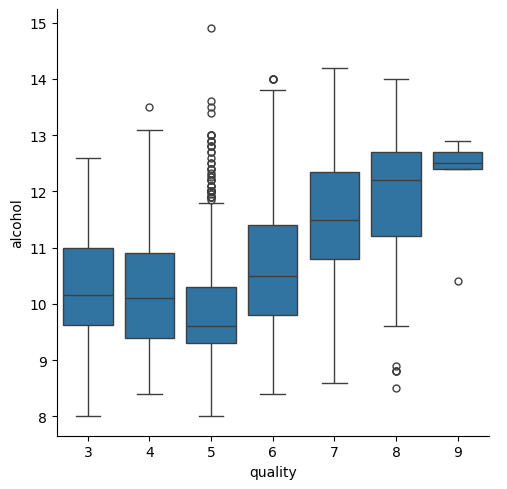

In [35]:
sns.catplot(x=output['quality'],y = df['alcohol'],kind='box')

<Axes: xlabel='alcohol', ylabel='pH'>

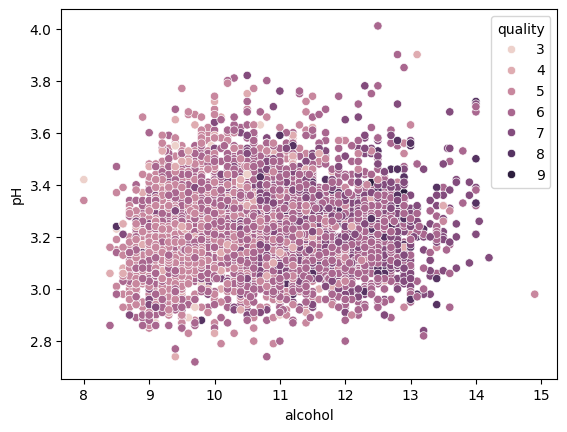

In [38]:
sns.scatterplot(x='alcohol', y = 'pH', data = df ,hue=output['quality'])